<a href="https://colab.research.google.com/github/DipayanSaha007/ViTraff/blob/main/Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!pip install ultralytics opencv-python-headless

In [43]:
from IPython.display import clear_output
clear_output()

In [44]:
from ultralytics import YOLO
import cv2
import threading
import time
import numpy as np
from google.colab.patches import cv2_imshow

In [45]:
# Pretrained model
model = YOLO('yolov8s.pt')

In [46]:
!pip install yt-dlp
!yt-dlp -f mp4 https://youtu.be/MNn9qKG2UFI -o traffic_demo.mp4

[youtube] Extracting URL: https://youtu.be/MNn9qKG2UFI
[youtube] MNn9qKG2UFI: Downloading webpage
[youtube] MNn9qKG2UFI: Downloading tv client config
[youtube] MNn9qKG2UFI: Downloading tv player API JSON
[youtube] MNn9qKG2UFI: Downloading ios player API JSON
[youtube] MNn9qKG2UFI: Downloading m3u8 information
[info] MNn9qKG2UFI: Downloading 1 format(s): 18
[download] traffic_demo.mp4 has already been downloaded
[download] 100% of   20.91MiB


In [47]:
# Creating a Threaded Frame
class VideoStream:
    def __init__(self, path):
        self.cap = cv2.VideoCapture(path)
        self.ret, self.frame = self.cap.read()
        self.running = True
        self.thread = threading.Thread(target=self.update)
        self.thread.start()

    def update(self):
        while self.running:
            self.ret, self.frame = self.cap.read()
            if not self.ret:
                self.running = False

    def read(self):
        return self.ret, self.frame

    def release(self):
        self.running = False
        self.thread.join()
        self.cap.release()

In [48]:
from collections import Counter

def detect_and_evaluate(video_path):
    stream = VideoStream(video_path)
    true_positives = 0
    false_positives = 0
    total_vehicles_detected = 0
    frame_count = 0

    vehicle_classes = ['car', 'truck', 'bus', 'motorbike', 'bicycle']

    while True:
        ret, frame = stream.read()
        if not ret:
            break

        frame_count += 1
        results = model(frame, verbose=False)[0]

        vehicle_count = 0
        for r in results.boxes.data:
            cls = int(r[5])
            label = model.names[cls]
            if label in vehicle_classes:
                vehicle_count += 1
                true_positives += 1
            else:
                false_positives += 1

        total_vehicles_detected += vehicle_count

        # Show frame
        annotated = results.plot()
        annotated = cv2.resize(annotated, (640, 360))
        cv2_imshow(annotated)


    stream.release()
    print(f"\n Total Frames: {frame_count}")
    print(f" Total Vehicles Detected: {total_vehicles_detected}")
    print(f" True Positives (vehicle classes): {true_positives}")
    print(f" False Positives (non-vehicle): {false_positives}")
    precision = true_positives / (true_positives + false_positives + 1e-6)
    print(f"\n🎯 Estimated Precision: {precision:.2f}")

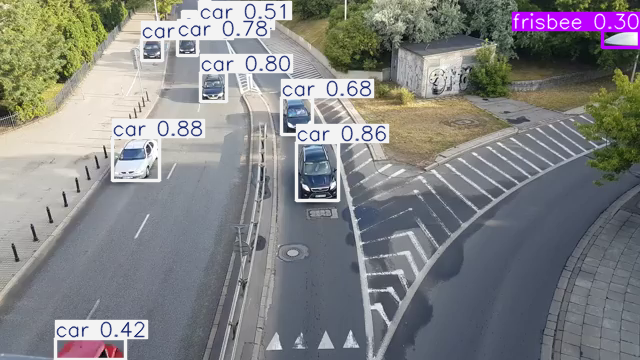

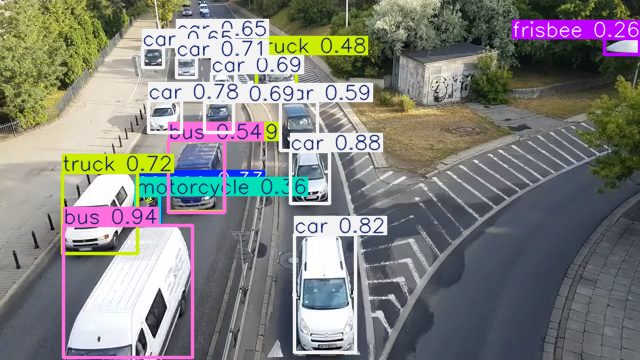

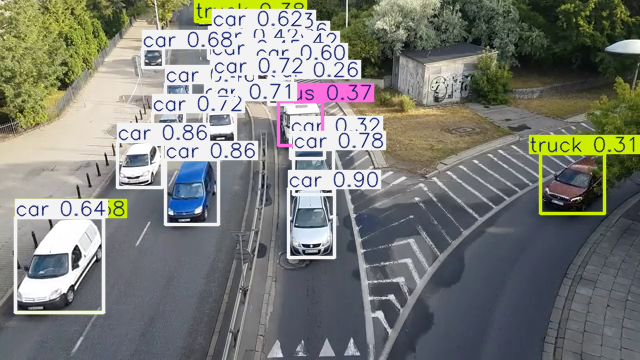

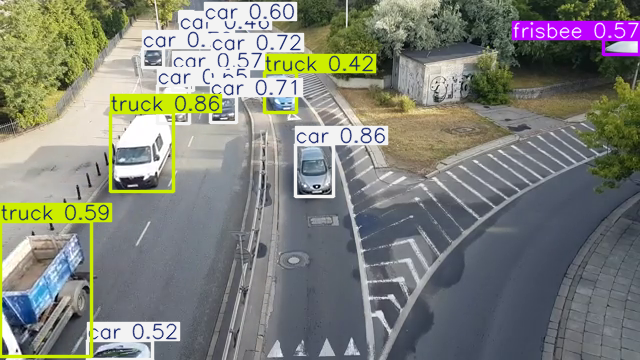

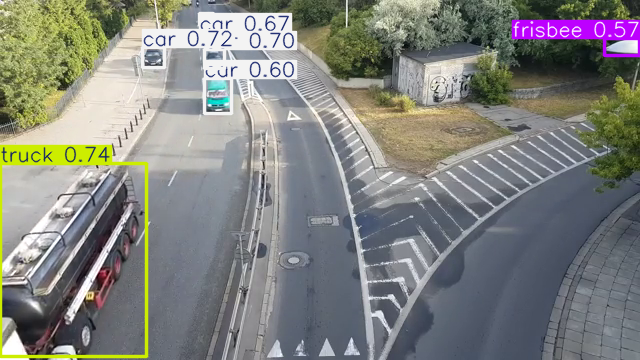

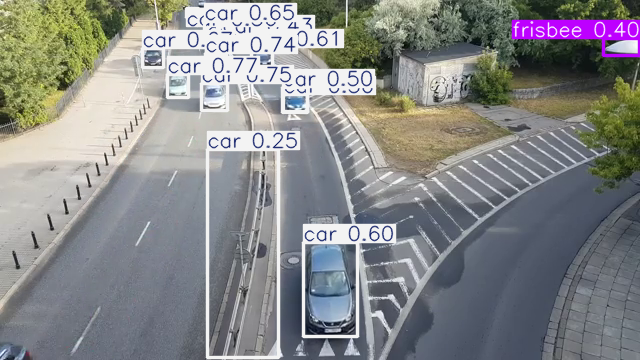

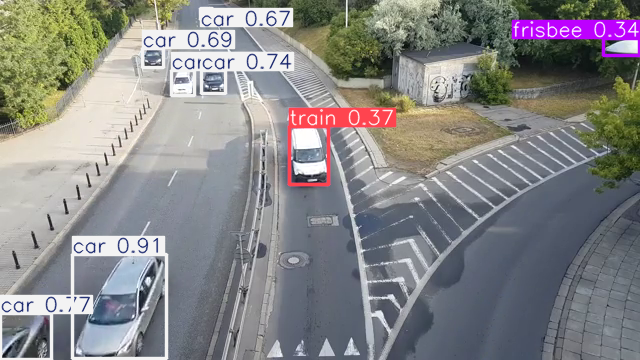

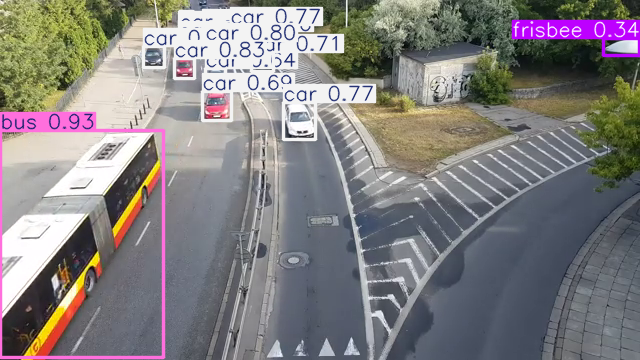

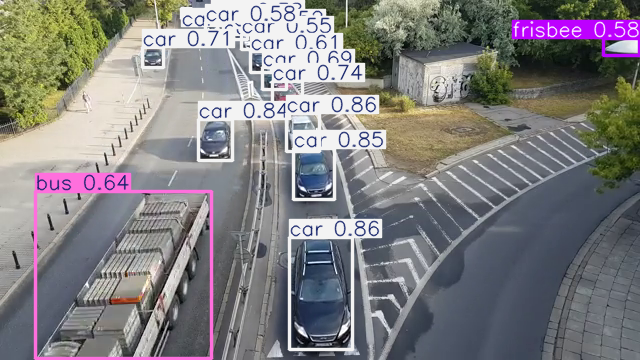

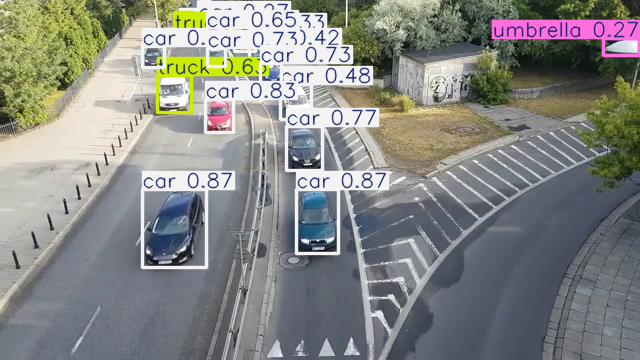

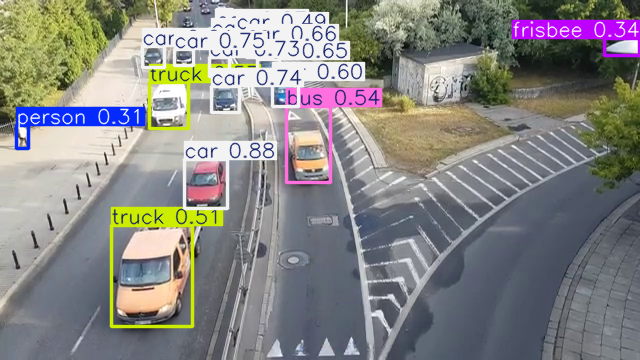

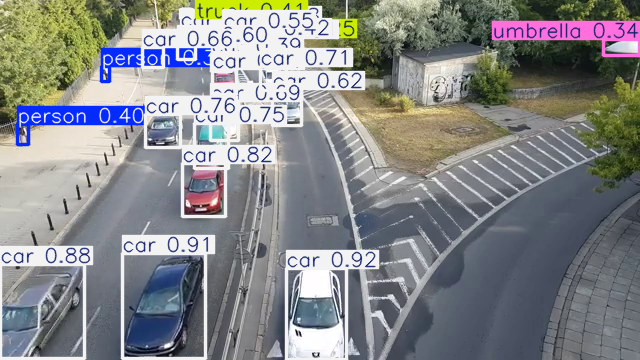

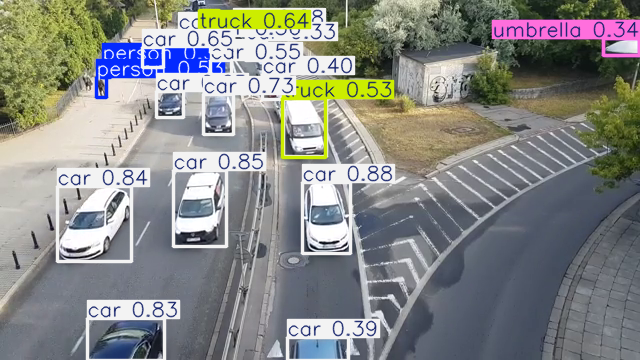

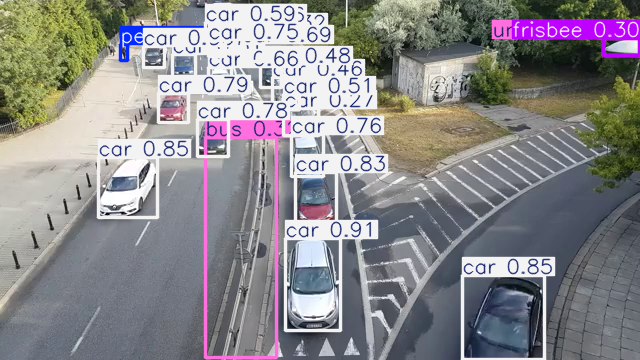

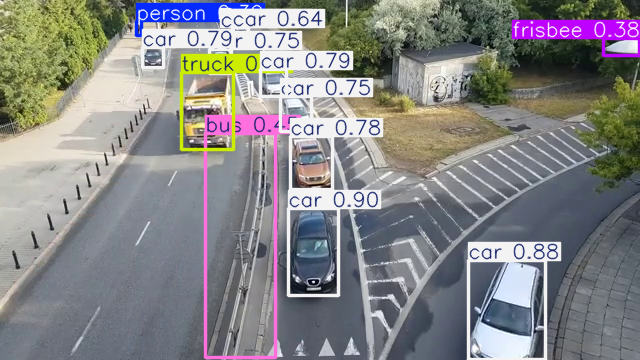

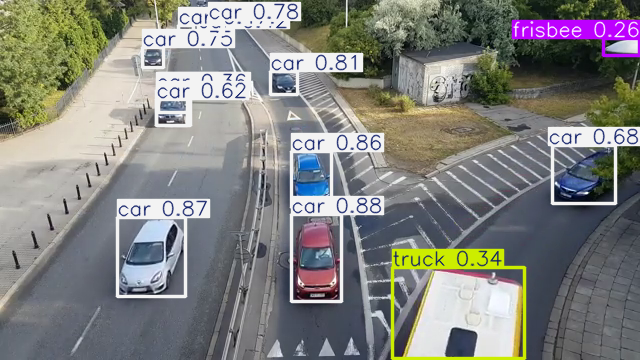

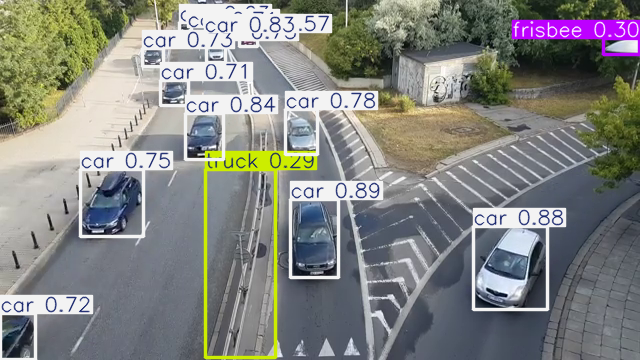

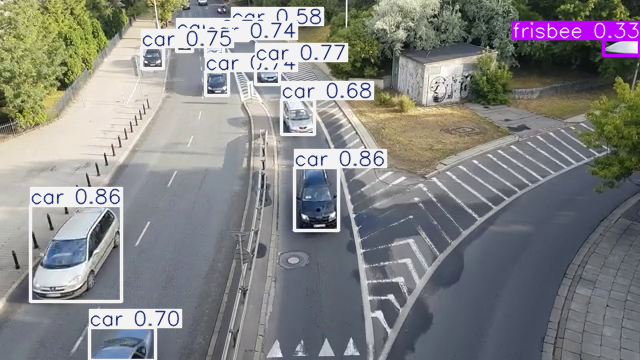

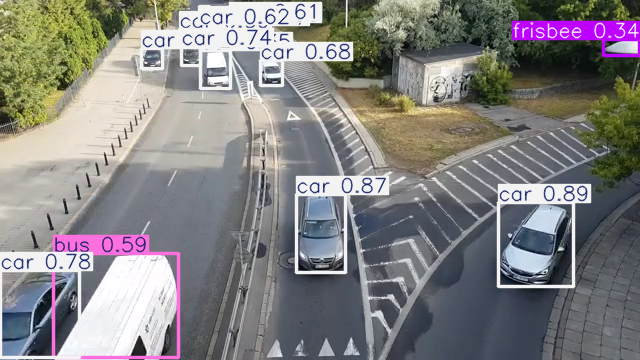


 Total Frames: 19
 Total Vehicles Detected: 261
 True Positives (vehicle classes): 261
 False Positives (non-vehicle): 31

🎯 Estimated Precision: 0.89


In [49]:

#Running the demo detection
detect_and_evaluate('traffic_demo.mp4')